# Vibração Livre 2 Não Amortecida com Graus de Liberdade

Notebook para análise de sistemas com dois graus de liberdade em vibração livre.

Vamos fazer o sistema explícito, via equação característica, mas vamos também fazê-lo calculando os autovalores e vetores da matriz dinâmica em outro notebook.

## Setup

In [42]:
import sympy as sp

## Matrizes do sistema

Vamos usar as matrizes de massa e rigidez para descrever o sistema.

Lembre-se que estas matrizes devem ser simétricas.

In [43]:
k = sp.Matrix([[80.0, -40.0], [-40.0, 80]])
m = sp.Matrix([[1.0, 0.0], [0.0, 1.0]])
display(k)
display(m)

Matrix([
[ 80.0, -40.0],
[-40.0,    80]])

Matrix([
[1.0,   0],
[  0, 1.0]])

## Frequências naturais

In [44]:
w = sp.symbols('omega')
Z = k - m*w**2
display(Z)

Matrix([
[80.0 - 1.0*omega**2,             -40.0],
[              -40.0, 80 - 1.0*omega**2]])

### Equação característica

In [45]:
eq_char= sp.det(Z)
display(eq_char)

1.0*omega**4 - 160.0*omega**2 + 4800.0

## Frequências naturais

In [46]:
Ω = sp.symbols('Omega')
eq_char2 = eq_char.subs(w**2, Ω)
display(eq_char2)

1.0*Omega**2 - 160.0*Omega + 4800.0

In [47]:
nat_freqs = sp.solve(eq_char2, Ω)
display(nat_freqs)

[40.0000000000000, 120.000000000000]

In [48]:
w1sq = min(nat_freqs)
w2sq = max(nat_freqs)
w1 = sp.sqrt(w1sq)
w2 = sp.sqrt(w2sq)
display(w1, w2)

6.32455532033676

10.9544511501033

## Modos normais
Para o primeiro modo,

In [49]:
r = -Z[0, 0]/Z[0, 1]
display(r)
r1 = r.subs(w, w1)
display(r1)
r2 = r.subs(w, w2)
display(r2)

2.0 - 0.025*omega**2

1.00000000000000

-1.00000000000000

## Resposta

In [50]:
t = sp.symbols('t')
ϕ_1, ϕ_2 = sp.symbols('phi_1, phi_2')
X11, X12 = sp.symbols('X11, X12')
xt = sp.Matrix([X11, r1*X11])*sp.cos(w1*t + ϕ_1) + sp.Matrix([X12, r2*X12])*sp.cos(w2*t + ϕ_2)
vt = xt.diff(t)
display(xt)
display(vt)

Matrix([
[        X11*cos(phi_1 + 6.32455532033676*t) + X12*cos(phi_2 + 10.9544511501033*t)],
[1.0*X11*cos(phi_1 + 6.32455532033676*t) - 1.0*X12*cos(phi_2 + 10.9544511501033*t)]])

Matrix([
[-6.32455532033676*X11*sin(phi_1 + 6.32455532033676*t) - 10.9544511501033*X12*sin(phi_2 + 10.9544511501033*t)],
[-6.32455532033676*X11*sin(phi_1 + 6.32455532033676*t) + 10.9544511501033*X12*sin(phi_2 + 10.9544511501033*t)]])

## Condições Iniciais

Vamos entrar com as condições iniciais como um vetor
$[x_1(0), x_2(0), \dot x_1(0), \dot x_2(0)] $.

In [75]:
IC = sp.Matrix([1, -1, 0, 0])

In [76]:
eq_sys = [xt[0] - IC[0],
          xt[1] - IC[1],
          vt[0] - IC[2],
          vt[1] - IC[3]]
eq_sys = [ eq.subs(t, 0) for eq in eq_sys]
display(eq_sys)

[X11*cos(phi_1) + X12*cos(phi_2) - 1,
 1.0*X11*cos(phi_1) - 1.0*X12*cos(phi_2) + 1,
 -6.32455532033676*X11*sin(phi_1) - 10.9544511501033*X12*sin(phi_2),
 -6.32455532033676*X11*sin(phi_1) + 10.9544511501033*X12*sin(phi_2)]

In [77]:
A, B, C, D = sp.symbols('A, B, C, D')
sys1 = [eq.subs([(X11*sp.cos(ϕ_1), A),
                 (X12*sp.cos(ϕ_2), B)]) for eq in eq_sys[:2]]
display(sys1)
sols = sp.solve(sys1)
A = sols[A]
B = sols[B]
display(A, B)

[A + B - 1, 1.0*A - 1.0*B + 1]

0.0

1.00000000000000

In [78]:
sys2 = [eq.subs([(X11*sp.sin(ϕ_1), C),
                 (X12*sp.sin(ϕ_2), D)]) for eq in eq_sys[2:]]
display(sys2)
sols = sp.solve(sys2)
C = sols[C]
D = sols[D]
display(C, D)

[-6.32455532033676*C - 10.9544511501033*D,
 -6.32455532033676*C + 10.9544511501033*D]

0.0

0.0

## Amplitudes dos modos normais e fases

In [79]:
vX11 = sp.sqrt(A**2 + C**2)
vϕ_1 = sp.atan2(C, A)
vX12 = sp.sqrt(B**2 + D**2)
vϕ_2 = sp.atan2(D, B)
display(vX11, vX12)
display(vϕ_1, vϕ_2)

0

1.00000000000000

nan

0

## Resposta final

In [80]:
xv = xt.subs([(X11, vX11), (X12, vX12), (ϕ_1, vϕ_1), (ϕ_2, vϕ_2)])
vv = vt.subs([(X11, vX11), (X12, vX12), (ϕ_1, vϕ_1), (ϕ_2, vϕ_2)])
display(xv)
display(vv)

Matrix([
[ 1.0*cos(10.9544511501033*t)],
[-1.0*cos(10.9544511501033*t)]])

Matrix([
[-10.9544511501033*sin(10.9544511501033*t)],
[ 10.9544511501033*sin(10.9544511501033*t)]])

## Resposta na forma gráfica

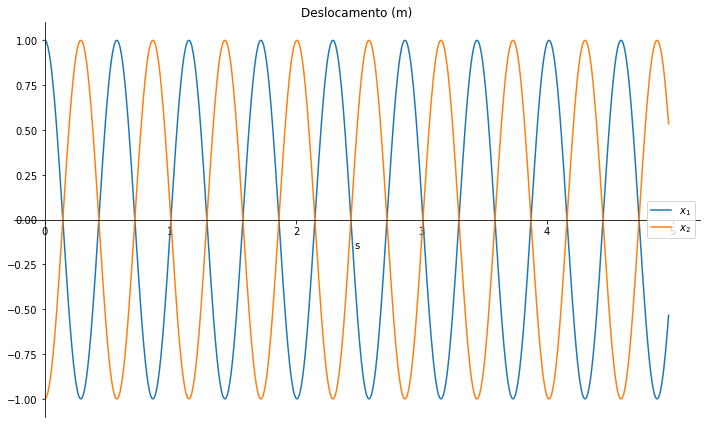

In [81]:
τ = 2*sp.pi/w1
p = sp.plot(xv[0], (t, 0, 5*τ), show=False, label=r'$x_1$', color='blue', adaptive=False, nb_of_points=1000)
p2 = sp.plot(xv[1], (t, 0, 5*τ), show=False, label=r'$x_2$', color='red', adaptive=False, nb_of_points=1000)
p.append(p2[0])
p.size = (10, 6)
p.title = "Deslocamento (m)"
p.xlabel = 's'
p.ylabel = None
p.legend = True
p.show()

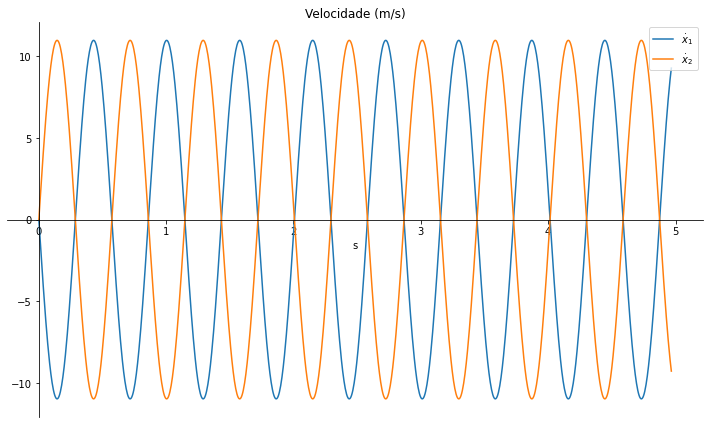

In [82]:
p = sp.plot(vv[0], (t, 0, 5*τ), show=False, label=r'$\dot x_1$', color='blue', adaptive=False, nb_of_points=1000)
p2 = sp.plot(vv[1], (t, 0, 5*τ), show=False, label=r'$\dot x_2$', color='red', adaptive=False, nb_of_points=1000)
p.append(p2[0])
p.size = (10, 6)
p.title = "Velocidade (m/s)"
p.xlabel = 's'
p.ylabel = ''
p.legend = True
p.show()

## Animação

É importante entender que a animação abaixo representa a variação das **coordenadas generalizadas** ao longo do tempo.

Só no caso do problema das duas massas horizontais as coordenadas generalizadas correspondem diretamente às coordenadas físicas, e a animação representa o "mundo real".

### Setup

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

### Posições iniciais

Estas posições iniciais são arbitrárias, é claro, mas é interessante estabelecê-las mais ou menos compatíveis com os deslocamentos calculados para que os deslocamentos sejam visíveis.

In [84]:
x1t = sp.lambdify(t, xv[0], 'numpy')
x2t = sp.lambdify(t, xv[1], 'numpy')

npoints = 1000
nper = 20
τ = 2*np.pi/float(w1)
times = np.linspace(0, nper*τ, npoints)

x1 = x1t(times)
x2 = x2t(times)

delta_x1 = np.abs(x1).max()
delta_x2 = np.abs(x2).max()

x10 = 0.0
x20 = x10 + 1.1*(delta_x1+delta_x2)
x1 += x10
x2 += x20
display(x10, x20)

0.0

2.2

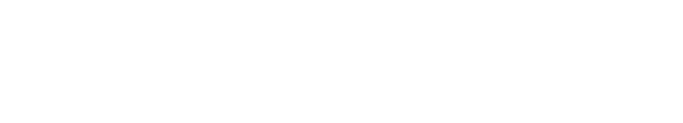

In [85]:
# plot
fig, ax = plt.subplots()
ax.set_xlim(left=x10-1.1*delta_x1, right=x20+1.1*delta_x2)
ax.set_axis_off()
fig.set(figheight=2, figwidth=12)
sc = ax.scatter([], [], s=400)
plt.show()

def draw_frame(n):
    data = np.array([[x1[n], 0],
                     [x2[n], 0]])
    sc.set_offsets(data)
    sc.set_color(('blue', 'red'))
    
anim = animation.FuncAnimation(fig, draw_frame, frames=x1.size, interval=50)
HTML(anim.to_html5_video())